# Coleta de Dados no MongoDB com R

In [3]:
#instalando pacote mongolite para manipulação ao MongoDB
install.packages("mongolite")

package 'mongolite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kleber Lima\AppData\Local\Temp\RtmpGUzcwd\downloaded_packages


In [2]:
#import library mongolite
library(mongolite)

Warning message:
"package 'mongolite' was built under R version 3.6.3"

In [4]:
#Conecta ao SGDB MongoDB

conn <- mongo(collection = "pessoas", db = "mongo", url = "mongodb://localhost")

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


In [6]:
query <- conn$find()

In [7]:
print(query)

    hostname           startTime          startTimeLocal
1 HOSTMASTER 2020-12-20 22:53:59 Sun Dec 20 21:53:59.418
2 HOSTMASTER 2020-12-20 22:55:09 Sun Dec 20 21:55:09.235
3 HOSTMASTER 2020-12-22 01:54:07 Tue Dec 22 00:54:07.563
4 HOSTMASTER 2020-12-22 01:55:06 Tue Dec 22 00:55:06.098
                                            cmdLine.config cmdLine.net.bindIp
1 C:\\Program Files\\MongoDB\\Server\\4.4\\bin\\mongod.cfg          127.0.0.1
2 C:\\Program Files\\MongoDB\\Server\\4.4\\bin\\mongod.cfg          127.0.0.1
3 C:\\Program Files\\MongoDB\\Server\\4.4\\bin\\mongod.cfg          127.0.0.1
4 C:\\Program Files\\MongoDB\\Server\\4.4\\bin\\mongod.cfg          127.0.0.1
  cmdLine.net.port cmdLine.service                    cmdLine.storage.dbPath
1            27017            TRUE D:\\Programas\\MongoDB\\Server\\4.4\\data
2            27017            TRUE D:\\Programas\\MongoDB\\Server\\4.4\\data
3            27017            TRUE D:\\Programas\\MongoDB\\Server\\4.4\\data
4            2701

### Ler a coleção Iris no arquivo CSV e inserir no MongoDB

In [11]:
iris <- read.csv("D:/praticas/datasets/CSV/iris.csv")

In [12]:
conn <- mongo(collection = "iris", db = "learnMongo", url = "mongodb://localhost")

In [13]:
conn$insert(iris)

List of 5
 $ nInserted  : num 150
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()

In [14]:
conn$find(limit=5)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
pessoas <- mongo(collection = "pessoas", db = "learnMongo", url = "mongodb://localhost")

str <- c('{"nome" : "Maria"}', '{"nome" : "Ana", "idade" : 23}', '{"nome" : "João"}')

pessoas$insert(str)

List of 6
 $ nInserted  : int 3
 $ nMatched   : int 0
 $ nModified  : int 0
 $ nRemoved   : int 0
 $ nUpserted  : int 0
 $ writeErrors: list()

In [18]:
pessoas$find()

nome,idade
Maria,NA
Ana,23
João,NA


In [19]:
pessoas$count()

[1] 3

In [20]:
pessoas$remove('{"idade" : 23}')
pessoas$count()

[1] 2

In [21]:
pessoas$find()

nome
Maria
João


In [22]:
str <- c('{"nome" : "Bill"}', '{"nome" : "Anna", "idade" : 23}', '{"nome" : "José", "idade" : 35}')

pessoas$insert(str)

List of 6
 $ nInserted  : int 3
 $ nMatched   : int 0
 $ nModified  : int 0
 $ nRemoved   : int 0
 $ nUpserted  : int 0
 $ writeErrors: list()

In [23]:
pessoas$find()

nome,idade
Maria,NA
João,NA
Bill,NA
Anna,23
José,35


In [24]:
pessoas$update('{"nome" : "Bill"}', '{"$set":{"idade" : 21}}')

List of 3
 $ modifiedCount: int 1
 $ matchedCount : int 1
 $ upsertedCount: int 0

In [25]:
pessoas$find()

nome,idade
Maria,NA
João,NA
Bill,21
Anna,23
José,35


In [16]:
iris <- mongo(collection = "iris", db = "learnMongo", url = "mongodb://localhost")

In [17]:
iris$count()

[1] 150

In [18]:
#Cria um dataframe com todos os dados da coleção
iris.df <- iris$find()

In [19]:
print(paste('Número de colunas: ', ncol(iris.df)))
print(paste('Número de linhas: ', nrow(iris.df)))
print(paste('Tamanho: ', length(iris.df)))

[1] "Número de colunas:  6"
[1] "Número de linhas:  150"
[1] "Tamanho:  6"


In [21]:
# imprime as 6 priimeiras liinhas do vetor(dataframe) iris
head(iris.df)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [22]:
#Imprime os nomeas de linhas do dataframe
print(rownames(iris.df))

  [1] "1"   "2"   "3"   "4"   "5"   "6"   "7"   "8"   "9"   "10"  "11"  "12" 
 [13] "13"  "14"  "15"  "16"  "17"  "18"  "19"  "20"  "21"  "22"  "23"  "24" 
 [25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "33"  "34"  "35"  "36" 
 [37] "37"  "38"  "39"  "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
 [49] "49"  "50"  "51"  "52"  "53"  "54"  "55"  "56"  "57"  "58"  "59"  "60" 
 [61] "61"  "62"  "63"  "64"  "65"  "66"  "67"  "68"  "69"  "70"  "71"  "72" 
 [73] "73"  "74"  "75"  "76"  "77"  "78"  "79"  "80"  "81"  "82"  "83"  "84" 
 [85] "85"  "86"  "87"  "88"  "89"  "90"  "91"  "92"  "93"  "94"  "95"  "96" 
 [97] "97"  "98"  "99"  "100" "101" "102" "103" "104" "105" "106" "107" "108"
[109] "109" "110" "111" "112" "113" "114" "115" "116" "117" "118" "119" "120"
[121] "121" "122" "123" "124" "125" "126" "127" "128" "129" "130" "131" "132"
[133] "133" "134" "135" "136" "137" "138" "139" "140" "141" "142" "143" "144"
[145] "145" "146" "147" "148" "149" "150"


In [23]:
print(colnames(iris.df))

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"      


In [24]:
write.csv(iris.df, 'D:/praticas/datasets/csv/iris2.csv', row.names=FALSE)

In [25]:
iris.df2 <- iris.df
head(iris.df2)

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [27]:
print("Colunas do dataframe 2:")
print('')
print(colnames(iris.df2))

[1] "Colunas do dataframe 2:"
[1] ""
[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"      


In [28]:
iris.df2$Id <- NULL
iris.df2$Species <- NULL
print("Colunas do dataframe 2 após setar colunas ID e Species como NULL:")
print('')
print(colnames(iris.df2))

[1] "Colunas do dataframe 2 após setar colunas ID e Species como NULL:"
[1] ""
[1] "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm" "PetalWidthCm" 


In [29]:
#Renomear colunas do dataframe
colnames(iris.df2)[1] <- "Comprimento_Sepala"
colnames(iris.df2)[2] <- "Largura_Sepala"
colnames(iris.df2)[3] <- "Comprimento_Petala"
colnames(iris.df2)[4] <- "Largura_Petala"
print(colnames(iris.df2))

[1] "Comprimento_Sepala" "Largura_Sepala"     "Comprimento_Petala"
[4] "Largura_Petala"    


In [30]:
summary(iris.df2)

 Comprimento_Sepala Largura_Sepala  Comprimento_Petala Largura_Petala 
 Min.   :4.300      Min.   :2.000   Min.   :1.000      Min.   :0.100  
 1st Qu.:5.100      1st Qu.:2.800   1st Qu.:1.600      1st Qu.:0.300  
 Median :5.800      Median :3.000   Median :4.350      Median :1.300  
 Mean   :5.843      Mean   :3.054   Mean   :3.759      Mean   :1.199  
 3rd Qu.:6.400      3rd Qu.:3.300   3rd Qu.:5.100      3rd Qu.:1.800  
 Max.   :7.900      Max.   :4.400   Max.   :6.900      Max.   :2.500  

### Plotando gráficos no R 

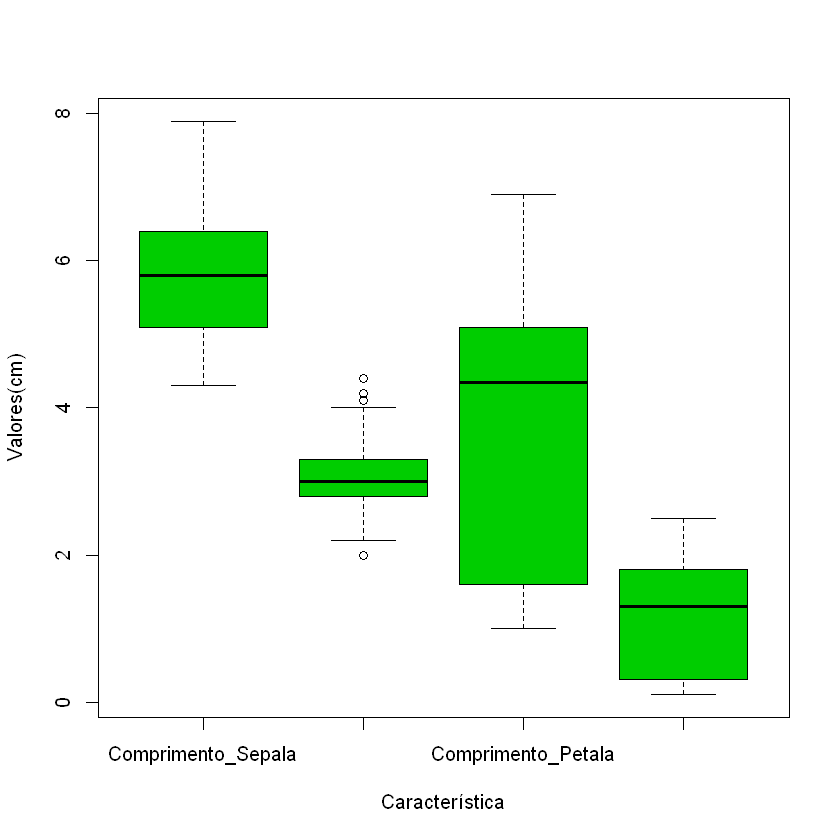

In [31]:
boxplot(iris.df2, col=3, ylab="Valores(cm)", xlab="Característica")

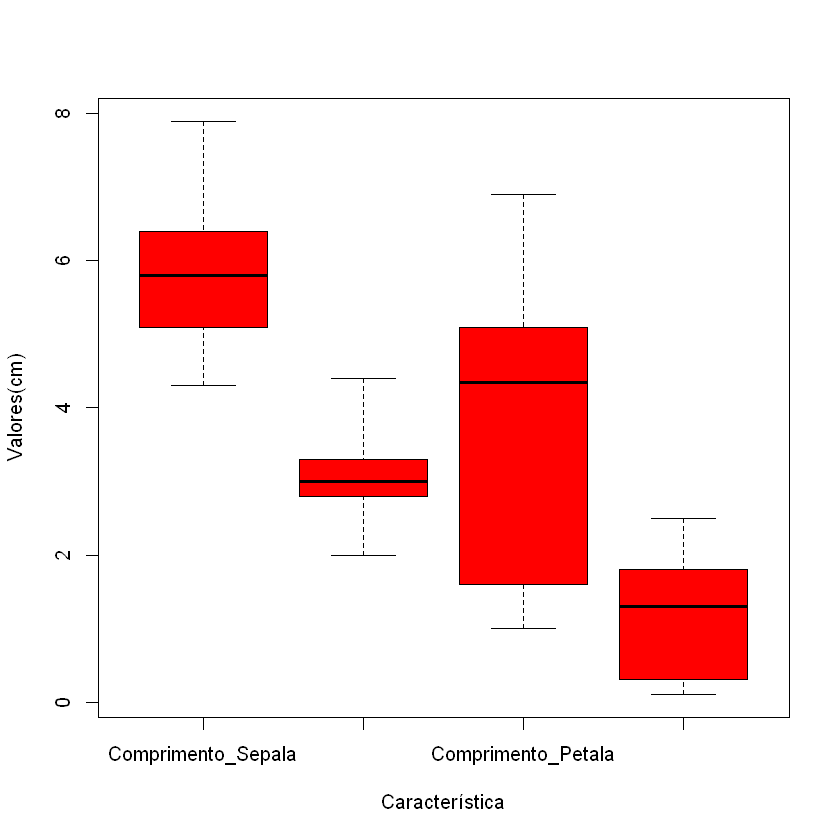

In [33]:
#Boxplot sem uso de outliers com o opção "range = 0"
boxplot(iris.df2, col=2, range=0, ylab="Valores(cm)", xlab="Característica")

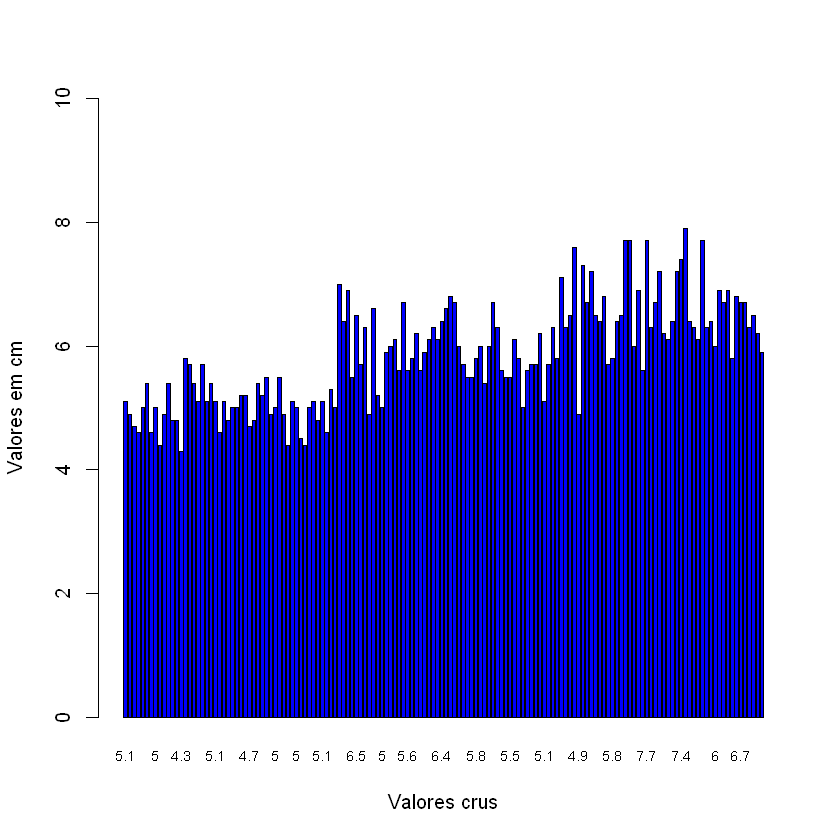

In [35]:
#Mostrar todas as observações cruas da ammostra A na forma de gráfico barplot. Anote y$A significa a
#coluna A de observações no arranjo de dados y
#parametro col=4 indica cor das barras para azul
barplot(iris.df2$Comprimento_Sepala, ylab="Valores em cm", xlab="Valores crus",
       names=as.character(iris.df2$Comprimento_Sepala), cex.names=0.7, ylim=c(0,10), col=4);

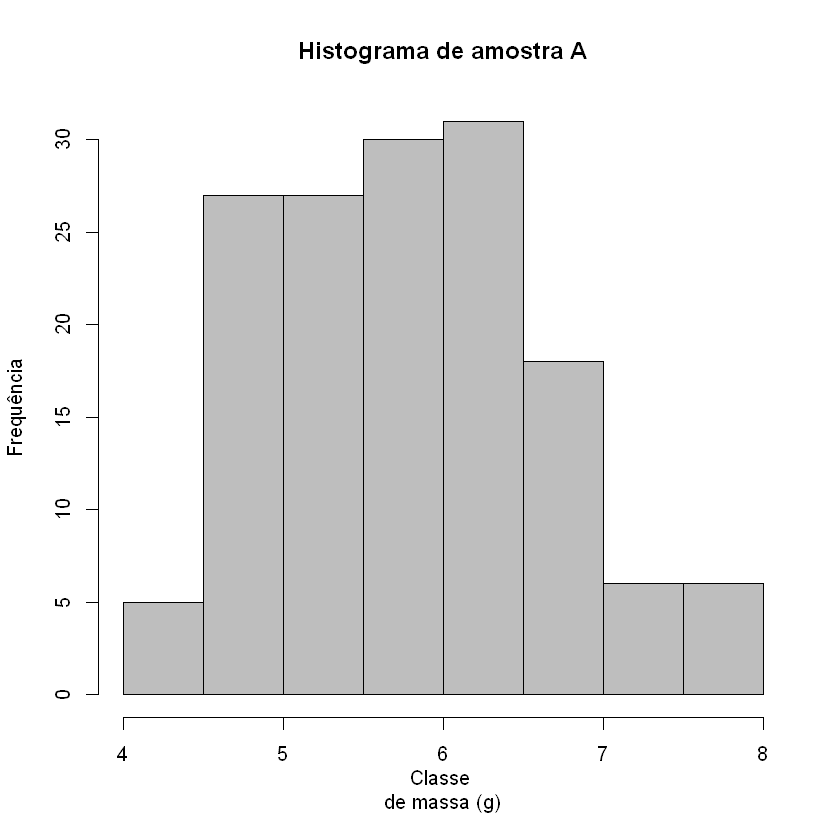

In [45]:
#Para monstrar um histograma de frequência das observações em amostra A (mais informmativo sobre a 
#distribuição das observações do que o gráfico anterior)
hist(iris.df2$Comprimento_Sepala, col=8, main="Histograma de amostra A", xlab="Classe 
de massa (g)", ylab="Frequência");

### Importar e exportar dados do MongoDB De/Para arquivos

#### Exportar dados de uma coleção para um arquivos JSON

In [46]:
#
iris$export(stdout())

{ "_id" : { "$oid" : "5fe25ae6e82b00006e005829" }, "Id" : 1, "SepalLengthCm" : 5.0999999999999996447, "SepalWidthCm" : 3.5, "PetalLengthCm" : 1.3999999999999999112, "PetalWidthCm" : 0.2000000000000000111, "Species" : "Iris-setosa" }
{ "_id" : { "$oid" : "5fe25ae6e82b00006e00582a" }, "Id" : 2, "SepalLengthCm" : 4.9000000000000003553, "SepalWidthCm" : 3.0, "PetalLengthCm" : 1.3999999999999999112, "PetalWidthCm" : 0.2000000000000000111, "Species" : "Iris-setosa" }
{ "_id" : { "$oid" : "5fe25ae6e82b00006e00582b" }, "Id" : 3, "SepalLengthCm" : 4.7000000000000001776, "SepalWidthCm" : 3.2000000000000001776, "PetalLengthCm" : 1.3000000000000000444, "PetalWidthCm" : 0.2000000000000000111, "Species" : "Iris-setosa" }
{ "_id" : { "$oid" : "5fe25ae6e82b00006e00582c" }, "Id" : 4, "SepalLengthCm" : 4.5999999999999996447, "SepalWidthCm" : 3.1000000000000000888, "PetalLengthCm" : 1.5, "PetalWidthCm" : 0.2000000000000000111, "Species" : "Iris-setosa" }
{ "_id" : { "$oid" : "5fe25ae6e82b00006e00582d" },

In [48]:
iris$export(file("dumpIris.json"))

In [49]:
iris$export(file("D:/praticas/datasets/CSV/dumpIris.json"))

### Importar 